### ***This code was used to create Fig S2, S7 and S9***

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 

c:\Users\USER2\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
df = pd.read_csv(r"file_path_of_decomposed_regionally_2060-2090.csv").iloc[:, 1:]  #Where we store the decomposed uncertainty 

In [16]:
uncert= {}
for code, group in df.groupby('code'):
    uncert[code] = group

In [17]:
data = {}
for key in uncert:
    data[key] = uncert[key].copy()

In [18]:
g = []
code = []

for k in data: 
    g.append(data[k]["gcm"].mean())
    code.append(k)

In [20]:
for key in data:
    df = data[key]
    df = df.apply(pd.to_numeric, errors='coerce')  
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    data[key][numeric_cols] = df[numeric_cols].clip(lower=0)

In [21]:
for key in data:
    data[key].drop(["gcm_T", "scenario_T", "method_T", "code"], axis = 1, inplace = True)
    data[key].set_index("year", inplace = True)

In [22]:
for key in data:
    data[key] = data[key]*100

In [23]:
for key in data:
    data[key] = data[key].rename(columns = {"gcm": "GCMs",
                                            "scenario": "Scenarios",
                                            "method": "Scaling Methods",
                                            "gcm:scenario": "GCMs x Scenarios",
                                            "gcm:method": "GCMs x Scaling Methods",
                                            "scenario:method": "Scenarios x Scaling Methods"})

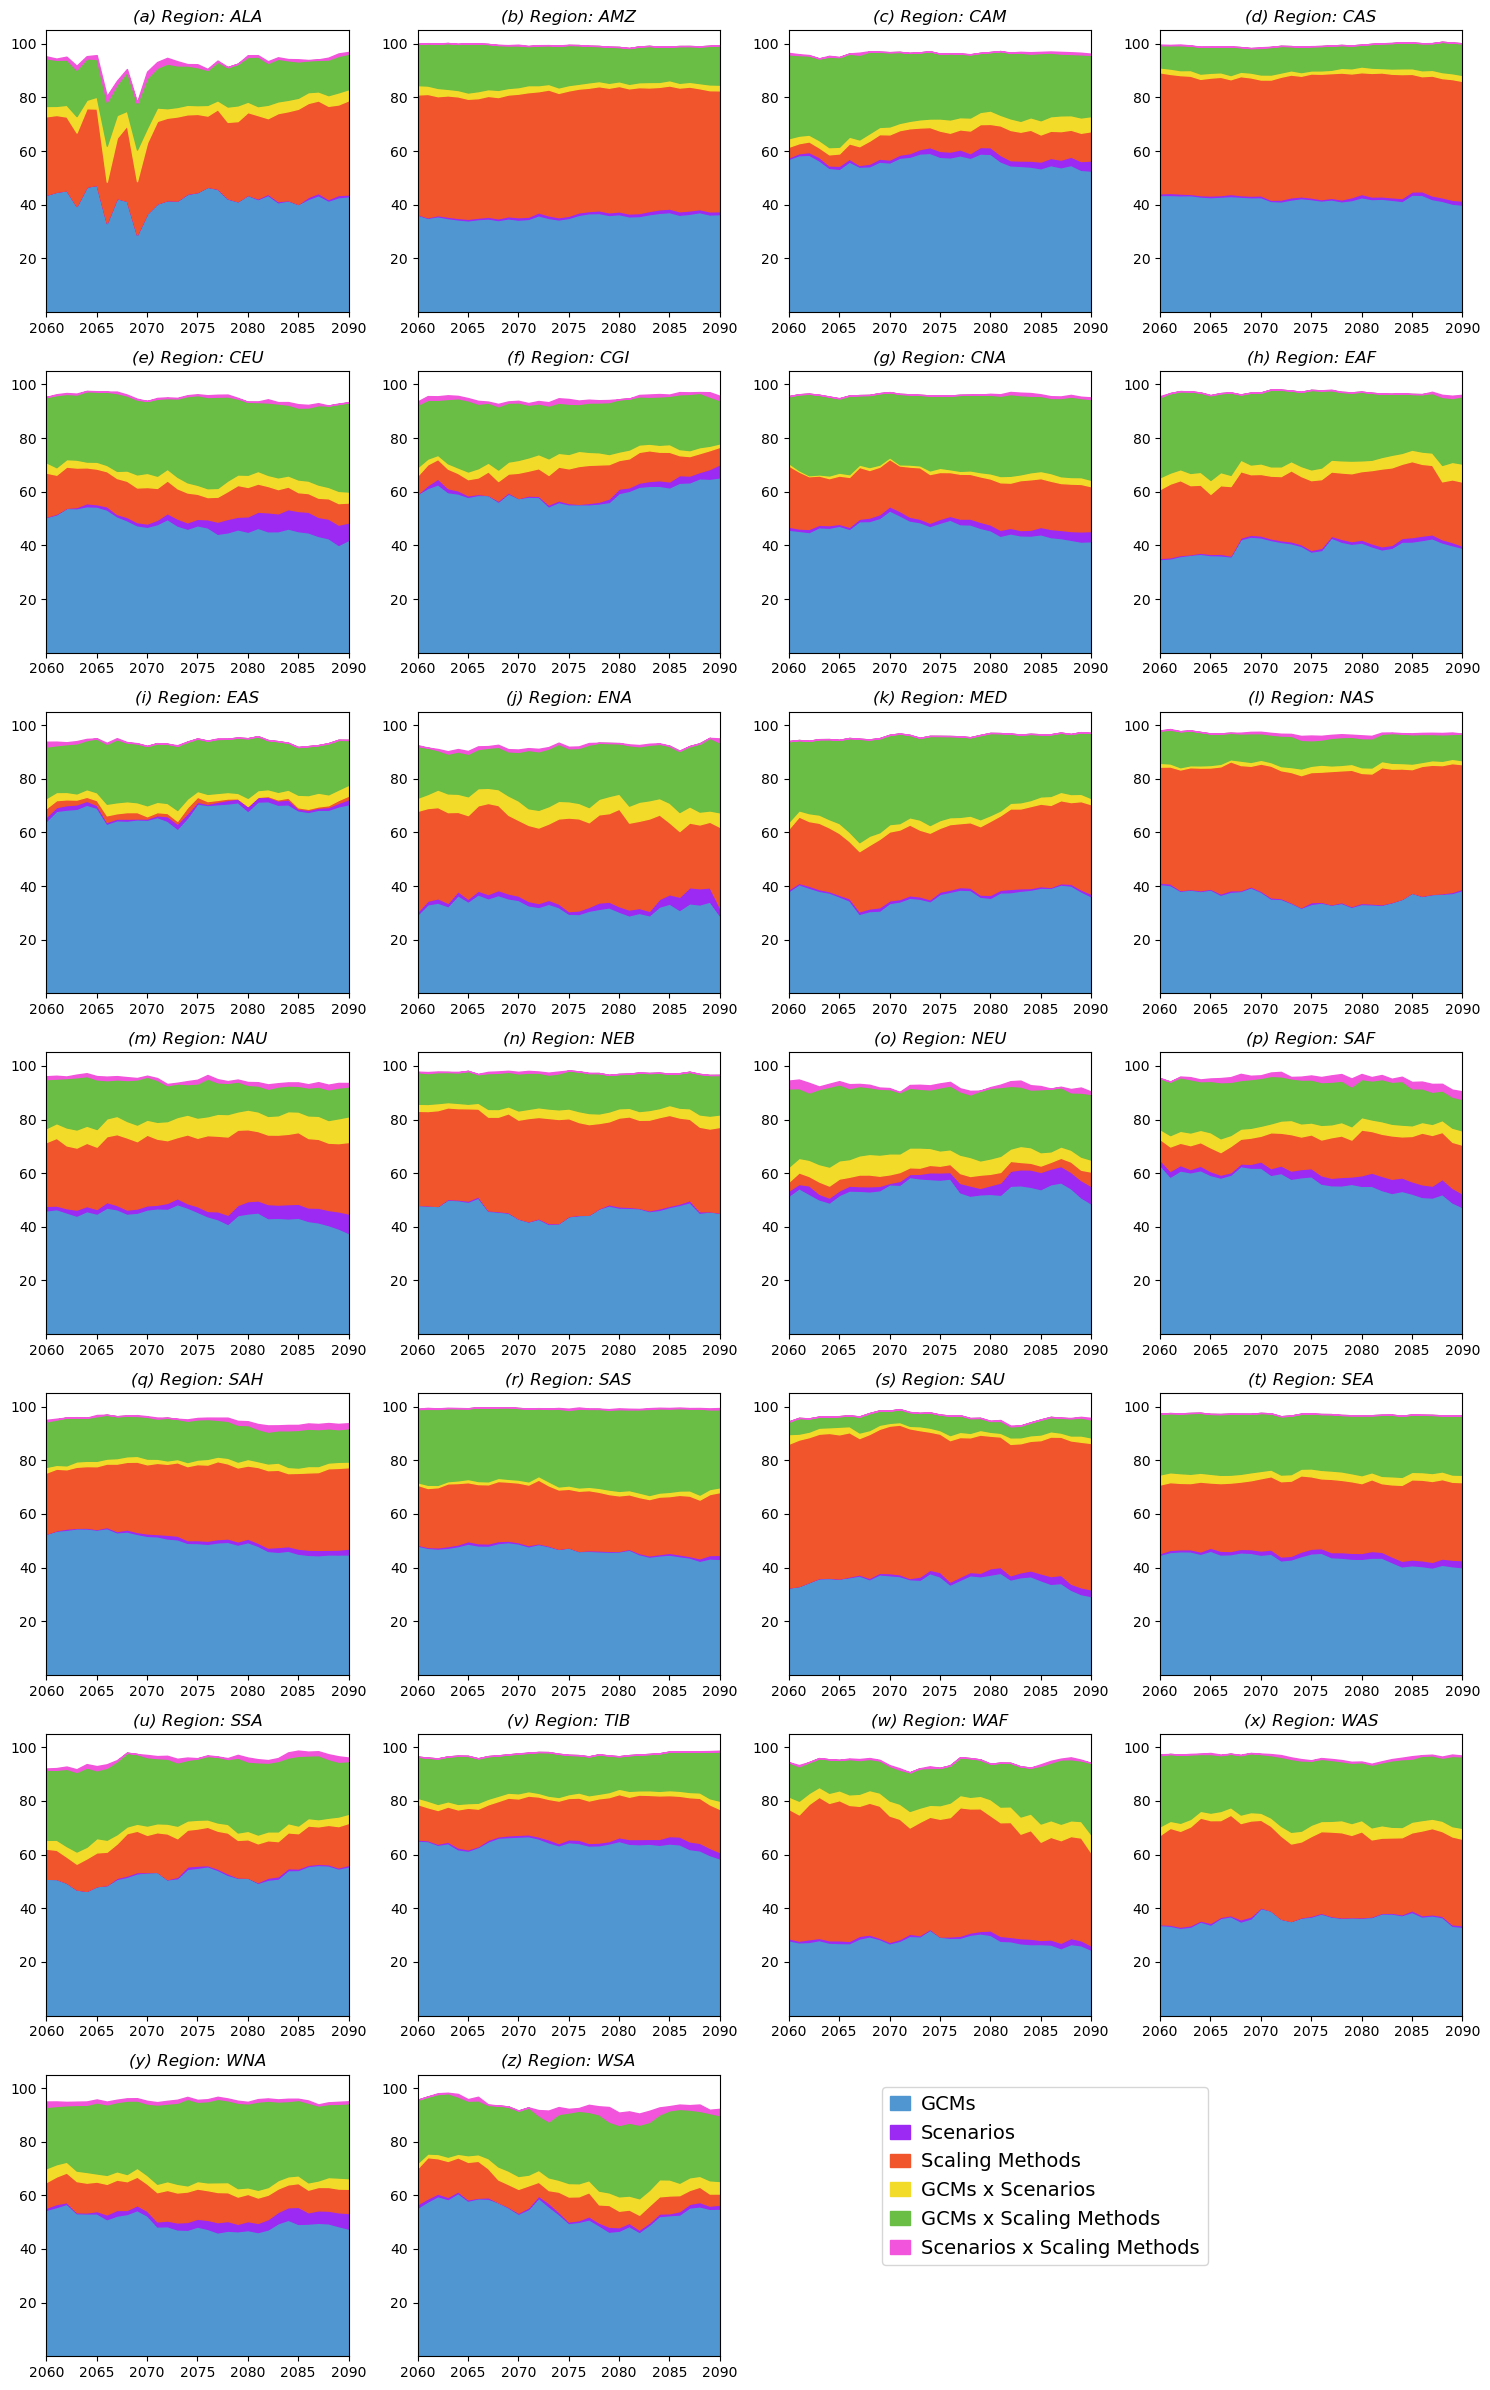

In [28]:
colors = sns.color_palette(["#5097D2","#9C2AF2", "#F1552B", "#F3DB29", "#6ABD45", "#F254DB"])

#exclude_keys = ["AMZ", "CGI", "NAU", "SSA", "SAF", "NAS"] #Use this for Fig S2
exclude_keys = [] # Use this for Fig S7 and S9

exclude = {}
for key in data:
    exclude[key] = data[key].copy()

for key in exclude_keys:
    if key in exclude:
        del exclude[key]

fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15, 24))  # Change rows to 5 for Fig S2 
axes_flat = axes.flatten()

def plot_area(ax, data, colors):
    cum_data = data.cumsum(axis=1)
    for i, column in enumerate(data.columns):
        ax.fill_between(data.index, cum_data[column], cum_data[column] - data[column], color=colors[i], label=column)
    ax.set_xlim(data.index.min(), data.index.max())
    # Customize y-axis ticks and labels
    ticks = ax.get_yticks()
    ax.set_yticks([tick for tick in ticks if tick != 0])  
    ax.set_ylim(0, 105)  

panel_labels = list("abcdefghijklmnopqrstuvwxyz")

for i, (key, value) in enumerate(exclude.items()):
    if i < len(axes_flat):  
        ax = axes_flat[i]
        plot_area(ax, value, colors)  
        ax.set_title(f"({panel_labels[i]}) Region: {key}", fontstyle='italic')
    else:
        break  

for j in range(len(exclude), len(axes_flat)):
    axes_flat[j].axis('off')

handles, labels = ax.get_legend_handles_labels()  
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.7, 0.05), ncol=1, handlelength=1, handletextpad=0.6, fontsize = 14)

plt.savefig("save_path", bbox_inches = "tight", dpi = 300)

plt.tight_layout()
plt.show()